# 911 Emergency Calls Analysis

### <b> About 911:</b>

Created by Congress in 2004 as the 911 Implementation and Coordination Office (ICO), the National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce

The National 911 Program's mission is to provide federal leadership and coordination in supporting and promoting optimal 911 services. This Federal "home" for 911 plays a critical role by coordinating federal efforts that support 911 services across the nation.Since its inception in 2004, the Program has fulfilled its mission by working with the 911 community to develop a variety of resources to improve today’s 911 system, and plan and implement Next Generation 911 (NG911)

#### Lets deep dive into the dataset and check for some interesting insights aobut the data 

In [2]:
# Importing all necessary  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', 1000)
import datetime as dt

In [3]:
# load the dataanyset
emergency_calls = pd.read_csv('E:\\UPGRAD-study\\Nikita\\Assignment\\911 Emergency Assignment\\911.csv')

In [4]:
# Lets look at the head of the data
emergency_calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A; 2015-12-10 @ 16:47:36;,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; Station 329; 2015-12-10 @ 16:56:52;,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# Check for shape
emergency_calls.shape

(423909, 9)

In [6]:
# check for info such as total columns, null values , total rows
emergency_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [7]:
# check for description of the data of numeric as well as object
emergency_calls.describe(include='all')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
count,423909.000000,423909.000000,423909,371780.000000,423909,423909,423750,423909,423909.0
unique,NaN,NaN,423837,NaN,141,409544,68,36051,NaN
top,NaN,NaN,GERMANTOWN PIKE; WORCESTER; 2017-09-27 @ 17:50:24-Station:STA83;,NaN,Traffic: VEHICLE ACCIDENT -,2018-10-06 19:26:38,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,NaN
freq,NaN,NaN,4,NaN,98401,9,36441,4328,NaN
mean,40.158618,-75.314022,NaN,19234.732269,NaN,NaN,NaN,NaN,1.0
std,0.129170,0.656048,NaN,301.388898,NaN,NaN,NaN,NaN,0.0
min,0.000000,-119.698206,NaN,3366.000000,NaN,NaN,NaN,NaN,1.0
25%,40.099784,-75.391547,NaN,19038.000000,NaN,NaN,NaN,NaN,1.0
50%,40.143900,-75.304563,NaN,19401.000000,NaN,NaN,NaN,NaN,1.0
75%,40.229008,-75.210760,NaN,19446.000000,NaN,NaN,NaN,NaN,1.0


In [8]:
# check for % missing value 
(emergency_calls.isnull().sum()/emergency_calls.shape[0])*100

lat           0.000000
lng           0.000000
desc          0.000000
zip          12.297215
title         0.000000
timeStamp     0.000000
twp           0.037508
addr          0.000000
e             0.000000
dtype: float64

In [9]:
# check for values in zipcode
emergency_calls.zip.value_counts(dropna=False)

NaN        52129
19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
19002.0    13380
19468.0    12393
19046.0    11720
19454.0    11457
19090.0    11149
19038.0    10946
19426.0    10561
19428.0     9494
19006.0     9473
19438.0     8987
19040.0     8590
19462.0     8447
19422.0     8187
19027.0     7819
19001.0     6496
19044.0     6481
19010.0     5692
18964.0     5502
19004.0     5352
19440.0     5339
19096.0     4808
19473.0     4775
19003.0     4700
19444.0     4614
19095.0     4362
19034.0     3898
19525.0     3857
18073.0     3083
18969.0     3078
19072.0     3016
19031.0     2619
19012.0     2590
19025.0     2166
19035.0     2112
19041.0     2102
18074.0     2027
19066.0     2026
19465.0     1948
19460.0     1909
19405.0     1892
18041.0     1752
19075.0     1473
19087.0     1463
18054.0     1458
18076.0     1315
19151.0     1277
19085.0     1199
19150.0     1185
18936.0     1131
18974.0      999
19512.0      904
19131.0      560
19128.0      5

In [10]:
# check for null values in township
emergency_calls.twp.value_counts(dropna=False)

LOWER MERION         36441
ABINGTON             25835
NORRISTOWN           23883
UPPER MERION         22694
CHELTENHAM           19629
POTTSTOWN            17500
UPPER MORELAND       14707
LOWER PROVIDENCE     14025
PLYMOUTH             12800
UPPER DUBLIN         11910
HORSHAM              11819
WHITEMARSH           11282
MONTGOMERY           11276
UPPER PROVIDENCE     10289
SPRINGFIELD           9673
LIMERICK              9351
WHITPAIN              8639
EAST NORRITON         8607
LANSDALE              7518
HATFIELD TOWNSHIP     7427
TOWAMENCIN            7301
LOWER GWYNEDD         7075
WEST NORRITON         7010
LOWER MORELAND        6929
LOWER POTTSGROVE      6852
FRANCONIA             5911
LOWER SALFORD         5800
UPPER GWYNEDD         5648
CHESTER COUNTY        4676
WORCESTER             3869
DOUGLASS              3620
CONSHOHOCKEN          3590
HATBORO               3496
SKIPPACK              3466
WEST CONSHOHOCKEN     3447
NEW HANOVER           3331
AMBLER                2738
J

In [11]:
# Dropping the rows with null values
emergency_calls.dropna(inplace = True)

In [12]:
# After dopping checking for null value
(emergency_calls.isnull().sum()/emergency_calls.shape[0])*100

lat          0.0
lng          0.0
desc         0.0
zip          0.0
title        0.0
timeStamp    0.0
twp          0.0
addr         0.0
e            0.0
dtype: float64

In [13]:
# checking for shape after dropping rows
emergency_calls.shape

(371711, 9)

In [14]:
# check for the values in title column
emergency_calls.title.value_counts(dropna=False)

Traffic: VEHICLE ACCIDENT -             83268
Traffic: DISABLED VEHICLE -             24819
Fire: FIRE ALARM                        22998
EMS: FALL VICTIM                        20029
EMS: RESPIRATORY EMERGENCY              20026
EMS: CARDIAC EMERGENCY                  19315
Traffic: ROAD OBSTRUCTION -             11321
EMS: SUBJECT IN PAIN                    11312
EMS: HEAD INJURY                        10548
EMS: VEHICLE ACCIDENT                   10461
EMS: GENERAL WEAKNESS                    6662
EMS: SYNCOPAL EPISODE                    6632
EMS: SEIZURES                            6487
EMS: UNKNOWN MEDICAL EMERGENCY           6425
EMS: ALTERED MENTAL STATUS               5839
EMS: MEDICAL ALERT ALARM                 5721
Fire: FIRE INVESTIGATION                 5633
EMS: ABDOMINAL PAINS                     5468
EMS: UNCONSCIOUS SUBJECT                 5009
EMS: HEMORRHAGING                        4957
EMS: CVA/STROKE                          4925
EMS: OVERDOSE                     

In [15]:
# spliting the title value in type of calls and emergency service
emergency_calls[['type_of_calls','emergency_service']] = emergency_calls.title.str.split(':',expand=True,)

# droping title column
emergency_calls.drop(['title'],axis=1,inplace=True)

In [16]:
# checking for head
emergency_calls.head()

,lat,lng,desc,zip,timeStamp,twp,addr,e,type_of_calls,emergency_service
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;,19401.0,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A; 2015-12-10 @ 16:47:36;,19401.0,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345; 2015-12-10 @ 15:39:04;,19446.0,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,HEAD INJURY


In [17]:
# changing datatype of the columns
emergency_calls['zip'] = emergency_calls.zip.astype('int64') # converting to integer
emergency_calls['timeStamp'] = pd.to_datetime(emergency_calls['timeStamp']) # converting to datetime
emergency_calls['date'] = emergency_calls['timeStamp'].dt.date # extracting date from timestamp column
emergency_calls['year'] = emergency_calls['timeStamp'].dt.year # extracting year from timestamp column
emergency_calls['month'] = emergency_calls['timeStamp'].dt.month # extracting month from timestamp column
emergency_calls['time'] = emergency_calls['timeStamp'].dt.time # extracting time from timestamp column
emergency_calls['hour'] = emergency_calls['timeStamp'].dt.hour # extracting hour from timestamp column
emergency_calls['weekdays'] = emergency_calls['timeStamp'].dt.weekday # extracting day of week from timestamp column

In [18]:
# checking for info 
emergency_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371711 entries, 0 to 423908
Data columns (total 16 columns):
lat                  371711 non-null float64
lng                  371711 non-null float64
desc                 371711 non-null object
zip                  371711 non-null int64
timeStamp            371711 non-null datetime64[ns]
twp                  371711 non-null object
addr                 371711 non-null object
e                    371711 non-null int64
type_of_calls        371711 non-null object
emergency_service    371711 non-null object
date                 371711 non-null object
year                 371711 non-null int64
month                371711 non-null int64
time                 371711 non-null object
hour                 371711 non-null int64
weekdays             371711 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 48.2+ MB


In [19]:
# Deriving  new columns time slot which indicates whether in day time, or night time or pre morning etc does the incidents happens
def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late_Night"

# creating time slot colums 
emergency_calls['time_slot'] = emergency_calls.hour.apply(lambda x: time_period(x))

In [20]:
# Creating day name based on week numbers
def weekdays(x):
    if x == 1:
        return "Monday"
    elif x == 2:
        return "Tuesday"
    elif x == 3:
        return "Wednesday"
    elif x == 4:
        return "Thursday"
    elif x == 5:
        return "Friday"
    elif x == 6:
        return "Saturday"
    else:
        return "Sunday"

# Creating dayname columns
emergency_calls['day_name'] = emergency_calls.weekdays.apply(lambda x: weekdays(x))

In [21]:
# deriving name of the month with monthnumber 
def monthname(x):
    if x == 1:
        return "January"
    elif x == 2:
        return "February"
    elif x == 3:
        return "March"
    elif x == 4:
        return "April"
    elif x == 5:
        return "May"
    elif x == 6:
        return "June"
    elif x == 7:
        return "July"
    elif x == 8:
        return "August"
    elif x == 9:
        return "September"
    elif x == 10:
        return "October"
    elif x == 11:
        return "November"
    else:
        return "December"

emergency_calls['month_name'] = emergency_calls.month.apply(lambda x: monthname(x))

In [22]:
# After derviving few columns lets check the dataset's head 
emergency_calls.head(2)

,lat,lng,desc,zip,timeStamp,twp,addr,e,type_of_calls,emergency_service,date,year,month,time,hour,weekdays,time_slot,day_name,month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,2015,12,17:10:52,17,3,Evening,Wednesday,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,2015,12,17:29:21,17,3,Evening,Wednesday,December


In [23]:
# dropping the original columns
emergency_calls.drop(['timeStamp','weekdays','month'],axis=1,inplace=True)

In [24]:
# Checking for head 
emergency_calls.head(2)

,lat,lng,desc,zip,twp,addr,e,type_of_calls,emergency_service,date,year,time,hour,time_slot,day_name,month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,2015,17:10:52,17,Evening,Wednesday,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,2015,17:29:21,17,Evening,Wednesday,December


#### Let us try to answer the following questions 

In [25]:
# 1. How many different types of calls?
emergency_calls['type_of_calls'].value_counts()  # As we can see there are 3 types of calls i) EMS ii) Traffic iii) Fire 

EMS        190278
Traffic    125370
Fire        56063
Name: type_of_calls, dtype: int64

In [26]:
# 2. Extract daye and time regarding the calls?
emergency_calls['date'].head() # Date from timestamp column

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
5    2015-12-10
Name: date, dtype: object

In [27]:
emergency_calls['time'].head() # Time from timestamp column

0    17:10:52
1    17:29:21
2    14:39:21
3    16:47:36
5    15:39:04
Name: time, dtype: object

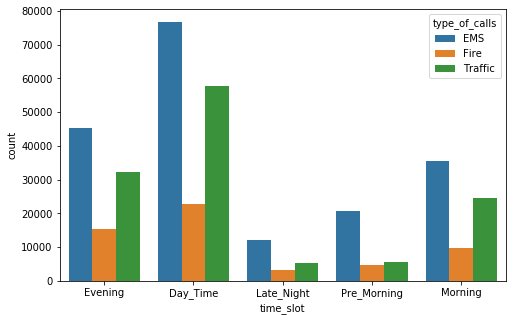

In [28]:
#3.At what time of day/month I can expect which type of call?
# Lets plot a countplot and look for at what time slot which type of call is expected
plt.figure(figsize=(8, 5))
sns.countplot(x = "time_slot", hue = "type_of_calls", data =emergency_calls)
plt.show()

- As we can see most of the call happens at day time i.e between 10 am to 5 pm and also most Emergency medical services (EMS)  

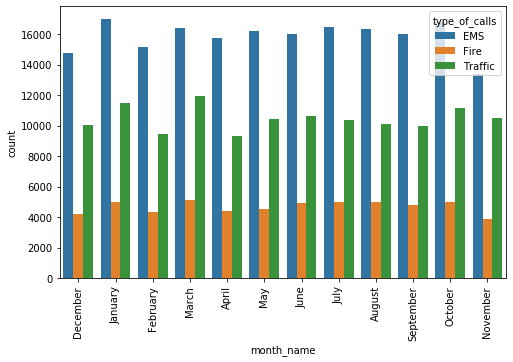

In [29]:
# Now lets plot the type of calls with respect to month  
plt.figure(figsize=(8, 5))
sns.countplot(x = "month_name", hue = "type_of_calls", data =emergency_calls)
plt.xticks(rotation=90)
plt.show()

- Most of the EMS is needed in January Month
- Most of the traffic and fire is in month of March 

In [30]:
#4. Visualize the percentage share of emergency type for each call

<BarContainer object of 3 artists>

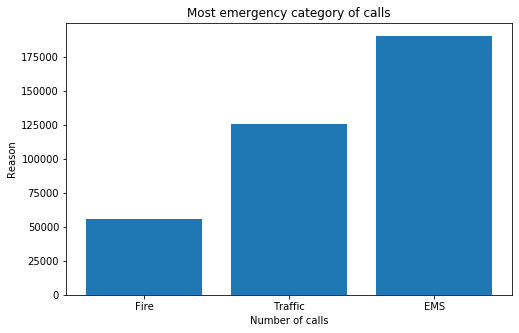

In [31]:
df = emergency_calls.type_of_calls.value_counts()
plt.figure(figsize=(8, 5))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()
plt.title("Most emergency category of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")

plt.bar(x, y)

<BarContainer object of 50 artists>

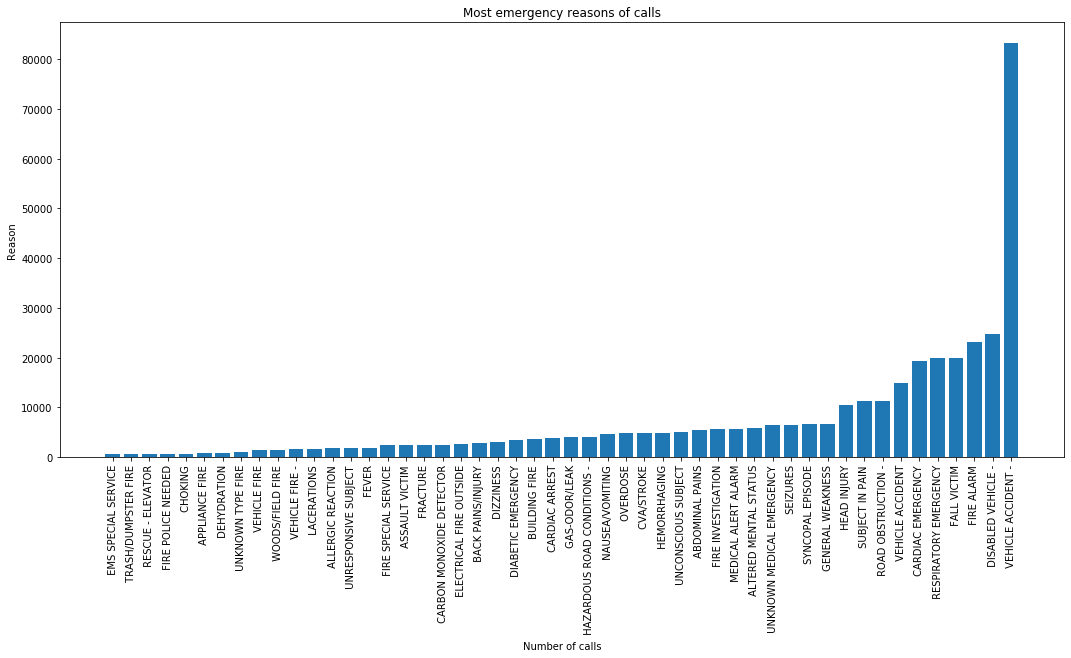

In [32]:
# % of type of emergency service 
# Top 50
df = emergency_calls.emergency_service.value_counts()[:50]
plt.figure(figsize=(18,8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()
plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")
plt.xticks(rotation = 90)
plt.bar(x, y)

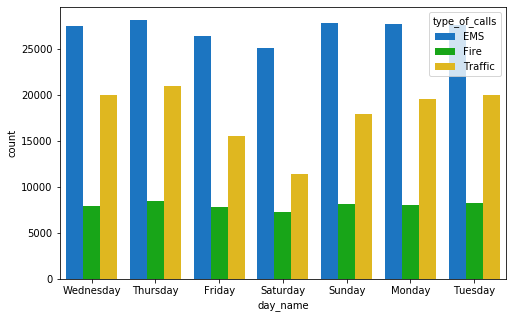

In [33]:
# check at which day does most of the type of calls occur
plt.figure(figsize=(8, 5))
sns.countplot(x=emergency_calls.day_name, data=emergency_calls, hue='type_of_calls',palette='nipy_spectral')

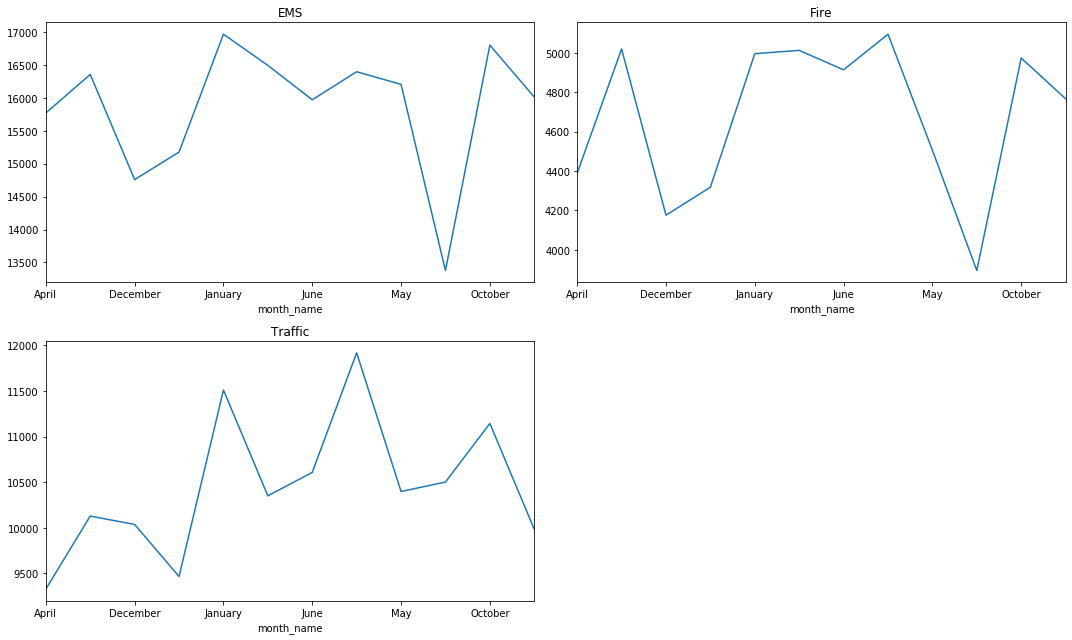

In [34]:
# Lets check for analysis monthwise of type of call 
plt.figure(figsize=(15, 9))
for i, reason in enumerate(emergency_calls.type_of_calls.unique(), 1):
    plt.subplot(2, 2, i)
    emergency_calls[emergency_calls['type_of_calls']==reason].groupby('month_name').count()['twp'].plot()
    plt.title(reason)
    plt.tight_layout()

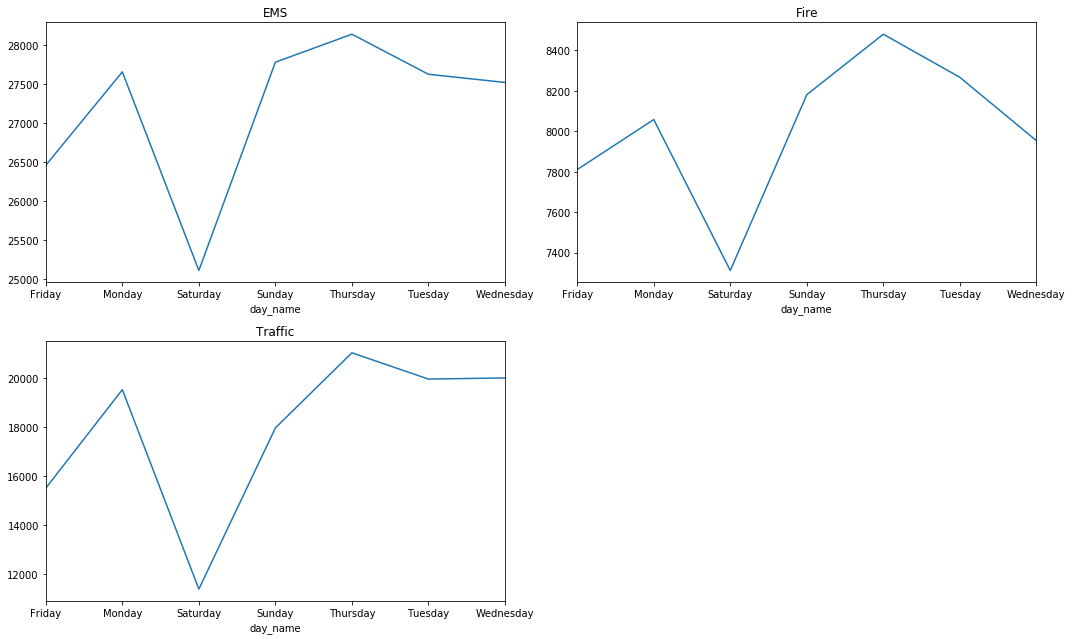

In [35]:
# Lets check for analysis daywise of type of call 
plt.figure(figsize=(15, 9))
for i, reason in enumerate(emergency_calls.type_of_calls.unique(), 1):
    plt.subplot(2, 2, i)
    emergency_calls[emergency_calls['type_of_calls']==reason].groupby('day_name').count()['twp'].plot()
    plt.title(reason)
    plt.tight_layout()

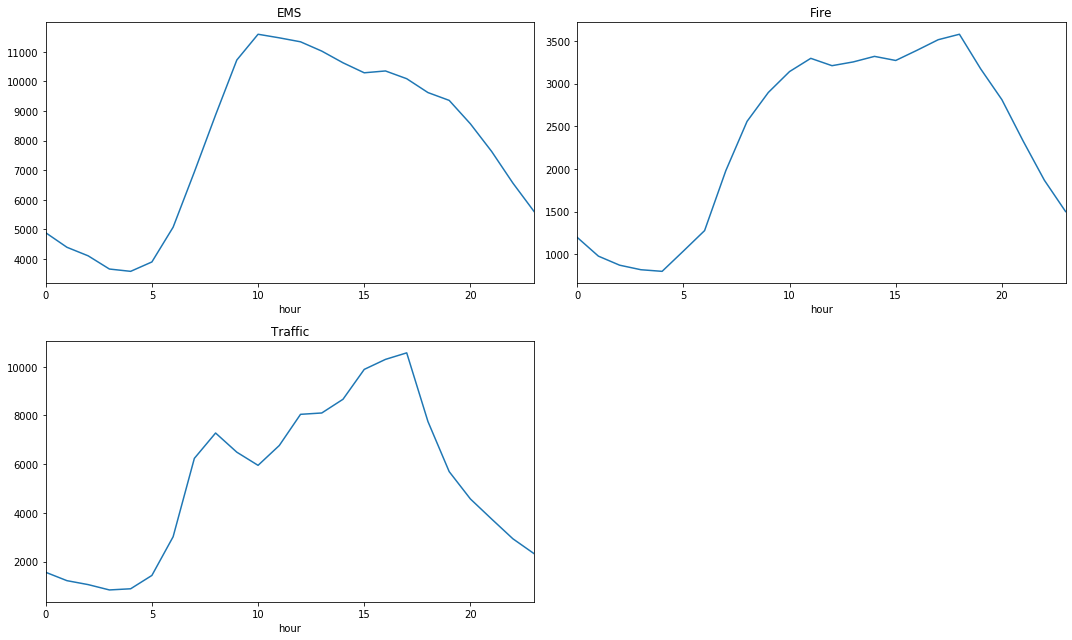

In [36]:
# Lets check for analysis hour of type of call 
plt.figure(figsize=(15, 9))
for i, reason in enumerate(emergency_calls.type_of_calls.unique(), 1):
    plt.subplot(2, 2, i)
    emergency_calls[emergency_calls['type_of_calls']==reason].groupby('hour').count()['twp'].plot()
    plt.title(reason)
    plt.tight_layout()

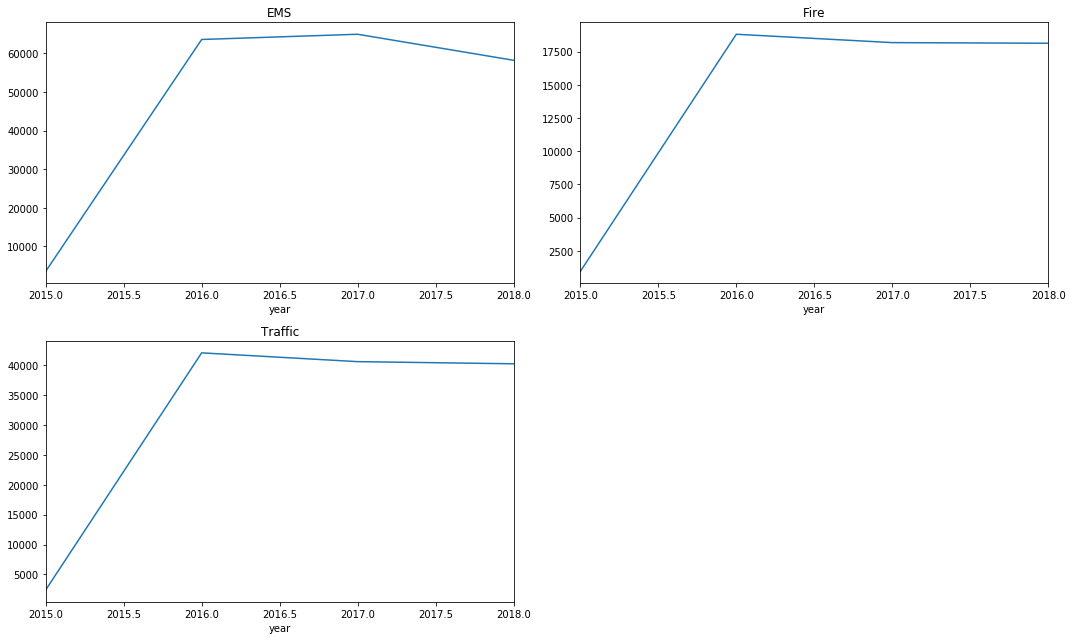

In [37]:
# Lets check for analysis year of type of call 
plt.figure(figsize=(15, 9))
for i, reason in enumerate(emergency_calls.type_of_calls.unique(), 1):
    plt.subplot(2, 2, i)
    emergency_calls[emergency_calls['type_of_calls']==reason].groupby('year').count()['twp'].plot()
    plt.title(reason)
    plt.tight_layout()